In [3]:
from keras.layers import BatchNormalization

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import backend
from keras.optimizers import Adam
from sklearn.metrics import r2_score
from mlxtend.plotting import plot_decision_regions

In [6]:
df = pd.read_csv("/Users/kirtisailinaidu/Downloads/Neural networks/Alphabets_data.csv")

In [7]:
df1 = df.copy()

In [8]:
df1.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
df1.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


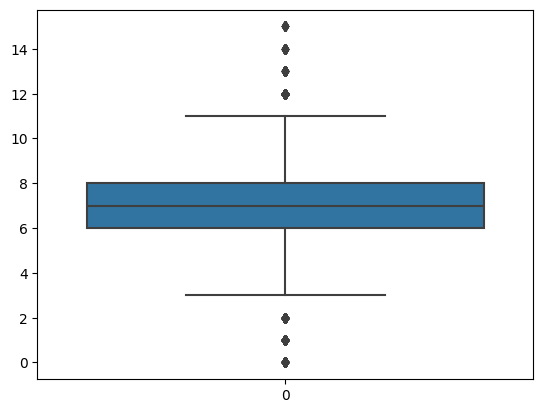

In [12]:
ax = sns.boxplot(df1['xbar'])

In [13]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.28816807323308624
Kurtosis: 0.32944688187343507


/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


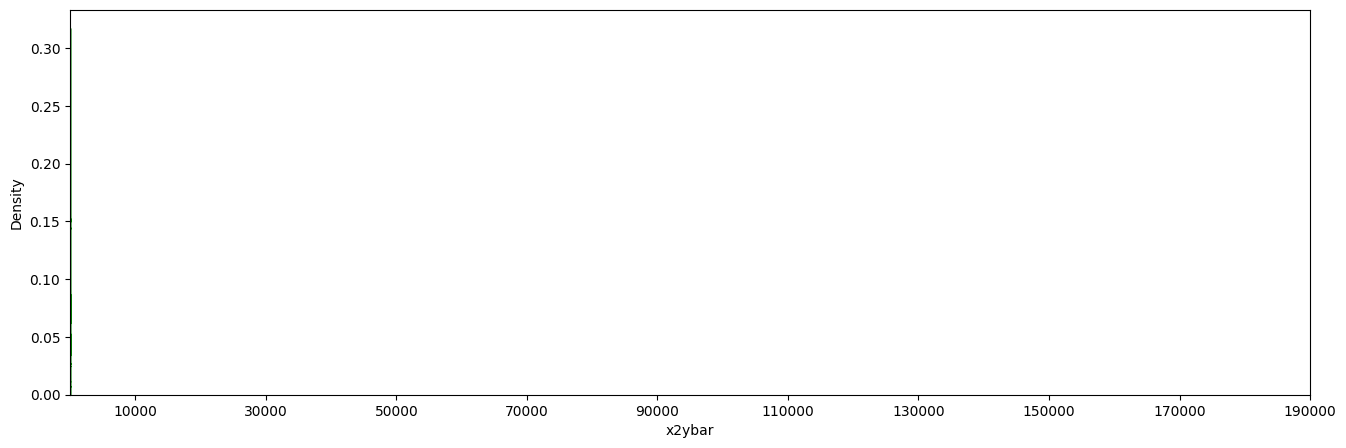

In [16]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['x2ybar'].skew()))
print("Kurtosis: {}".format(df1['x2ybar'].kurtosis()))
ax = sns.kdeplot(df1['x2ybar'], fill=True, color='g')  # Using `fill=True` instead of `shade=True`
plt.xticks([i for i in range(10000,200000,20000)])
plt.show()

In [17]:
dfa = df1[df1.columns]
month_colum = dfa.select_dtypes(include='object').columns.tolist()

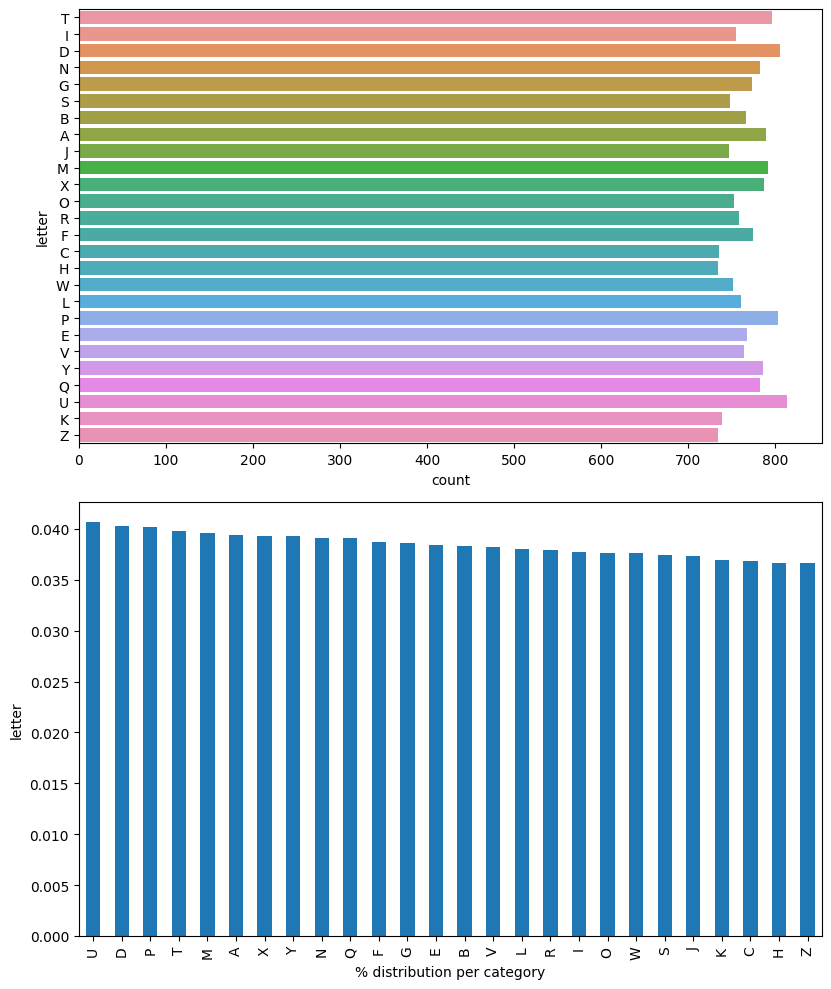

In [18]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [19]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

/var/folders/p0/vrfqq_vd7qs5cnv6g_1n5vnw0000gn/T/ipykernel_14702/2239169671.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/p0/vrfqq_vd7qs5cnv6g_1n5vnw0000gn/T/ipykernel_14702/2239169671.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be r

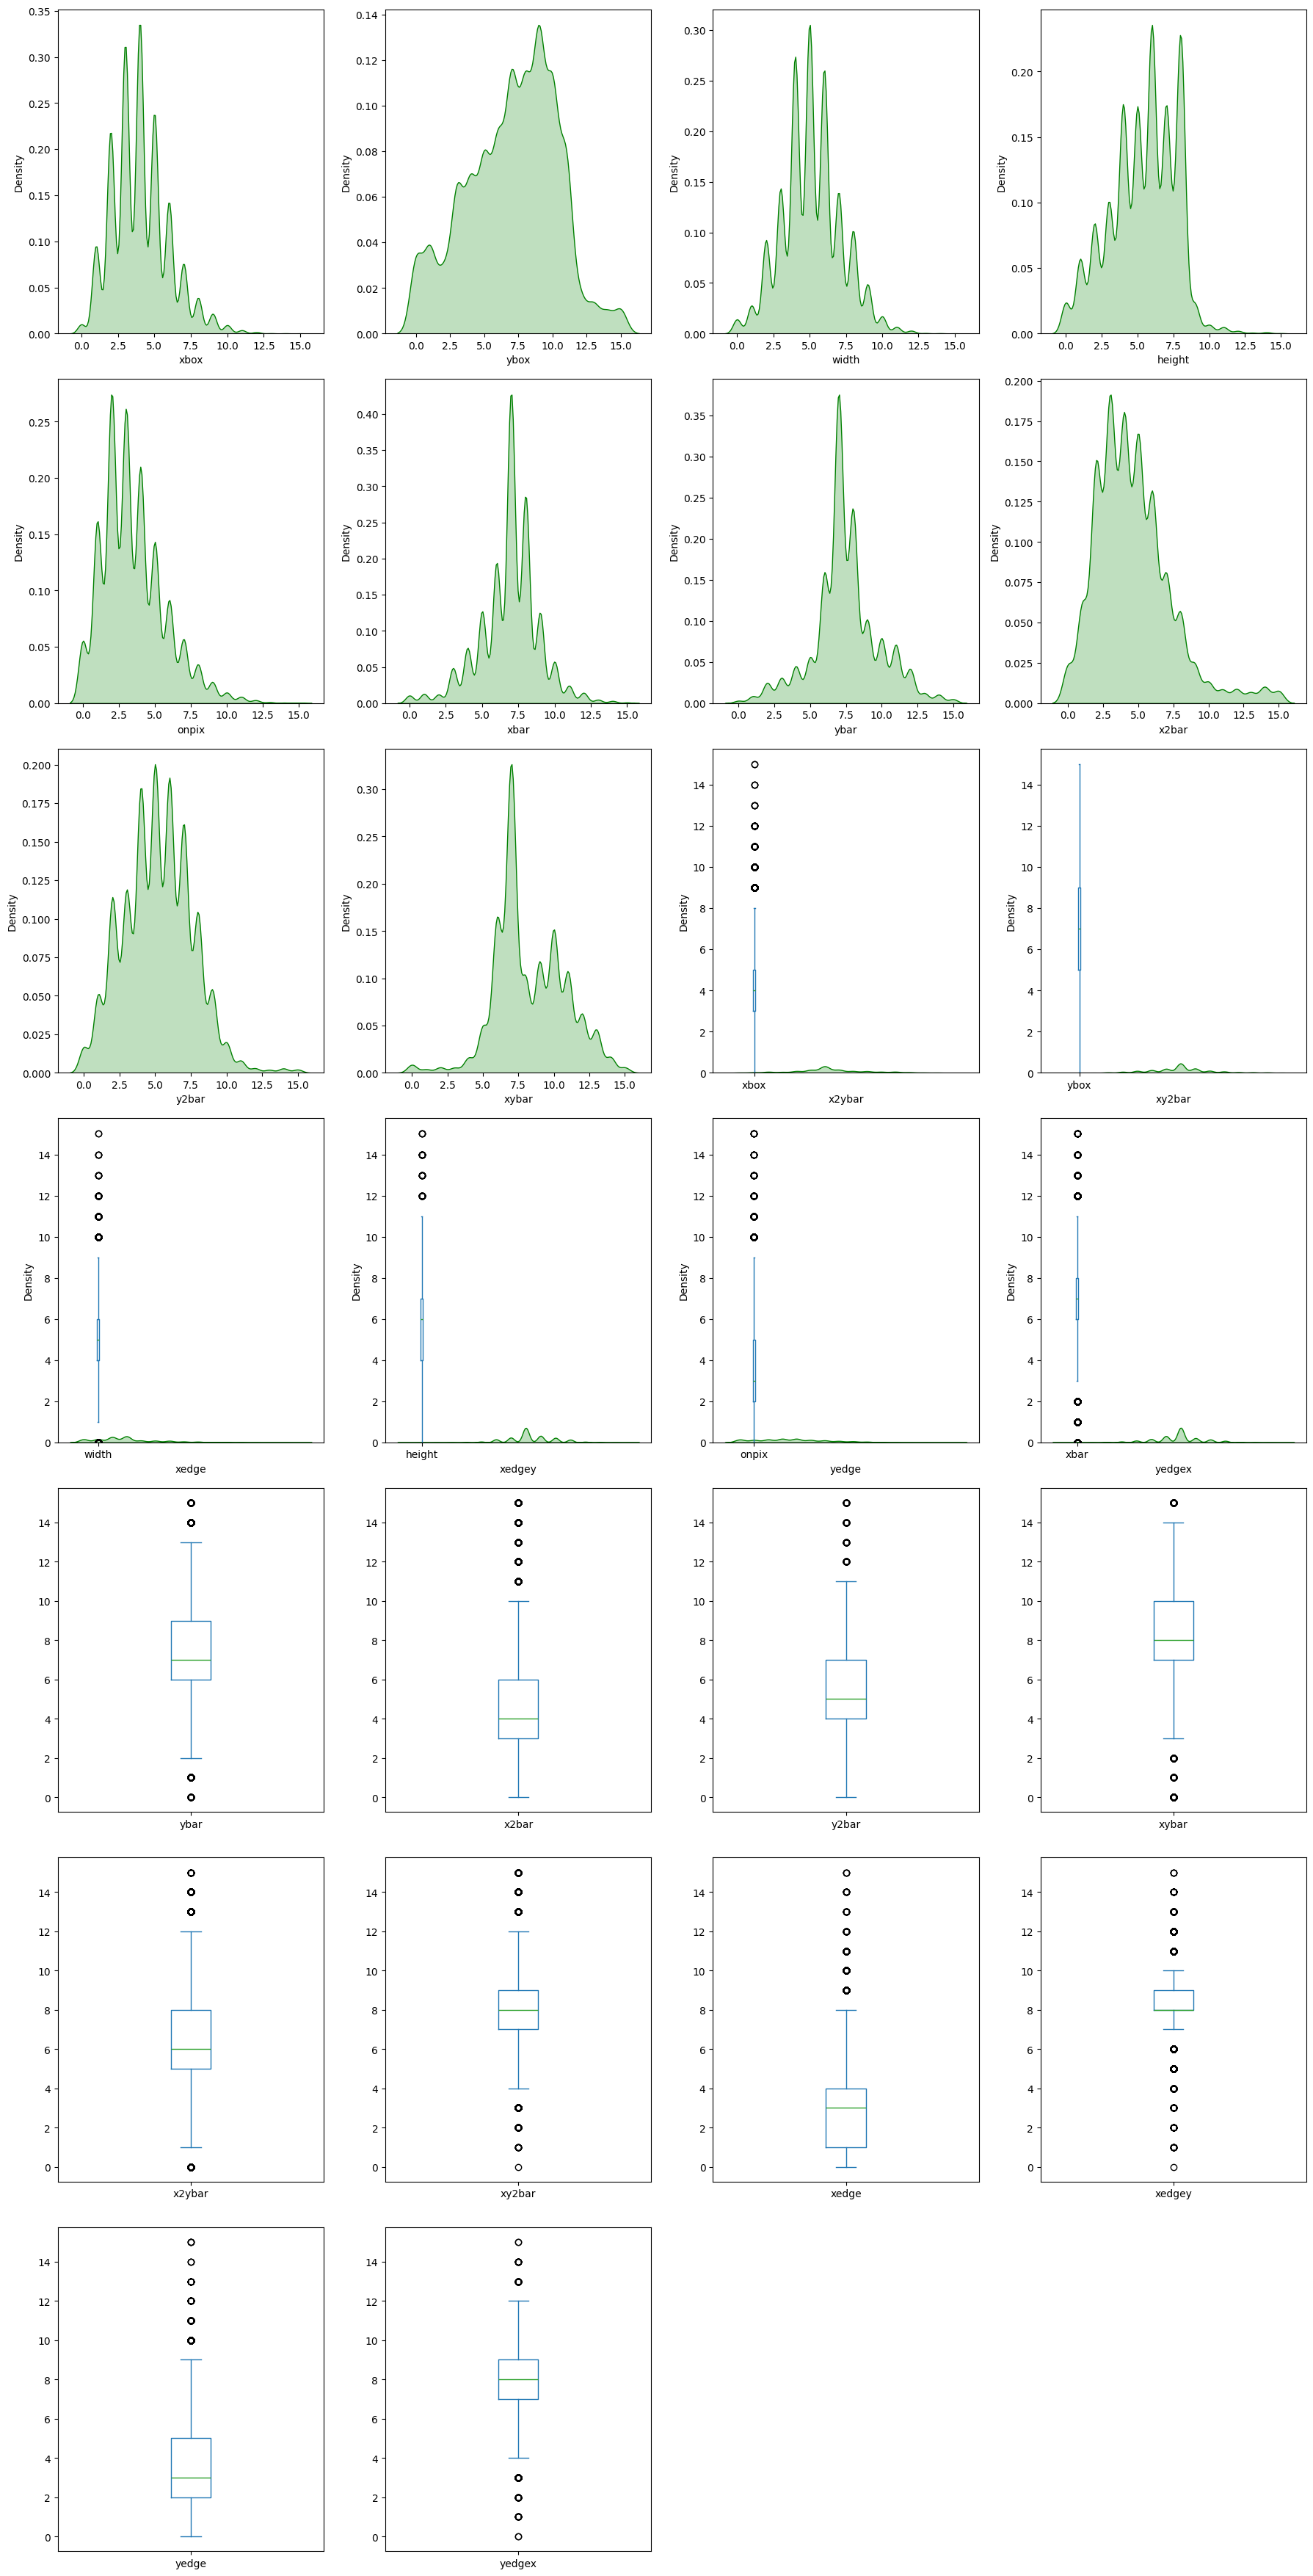

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
skewness,0.715056,-0.227967,0.234941,-0.278249,0.943373,-0.310079,0.093471,1.159975,0.286934,0.090078,0.288168,0.273728,1.057288,0.049198,0.468343,-0.199507
kurtosis,0.882928,-0.421179,0.304182,-0.249434,1.190194,1.493437,0.953907,2.075245,0.329941,0.323985,0.329447,1.007517,1.241373,0.887681,-0.306190,1.120773


In [20]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [22]:
df1 = pd.get_dummies(df1, columns = ['y2bar'])

/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

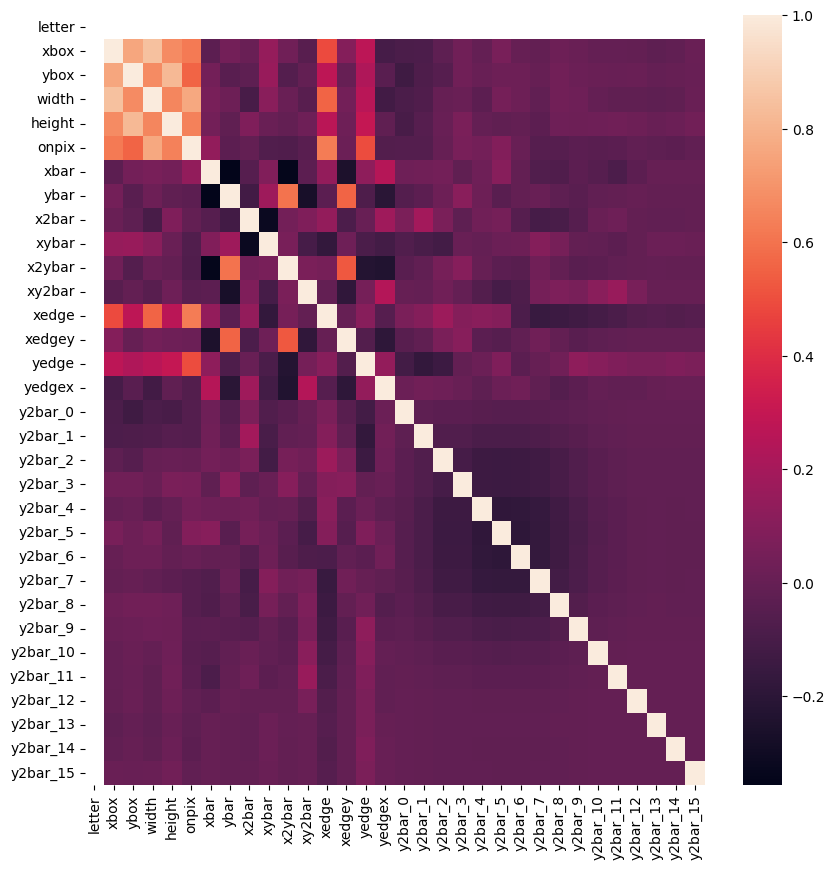

In [29]:
df1 = df1.apply(pd.to_numeric, errors='coerce')

corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)


In [30]:
df1.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge',
       'yedgex', 'y2bar_0', 'y2bar_1', 'y2bar_2', 'y2bar_3', 'y2bar_4',
       'y2bar_5', 'y2bar_6', 'y2bar_7', 'y2bar_8', 'y2bar_9', 'y2bar_10',
       'y2bar_11', 'y2bar_12', 'y2bar_13', 'y2bar_14', 'y2bar_15'],
      dtype='object')

In [31]:
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return (x)

In [33]:
def norm_func(i):
    # Convert non-numeric values to NaN
    i_numeric = pd.to_numeric(i, errors='coerce')
    # Compute the normalized values
    x = (i_numeric - i_numeric.min()) / (i_numeric.max() - i_numeric.min())
    return x

In [35]:
X = df1.drop(columns=['xbar'])
y = df1['xbar']

In [36]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.3)

In [37]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [39]:
model = prep_model([6,5,1])

In [43]:
model.fit(np.array(x_train),np.array(y_train),epochs=6)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [44]:
train = model.predict(np.array(x_train))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).